In [ ]:
태양광 

(sum)|실제값-예측값| 
-------------------- x 100 
   (sum) 실제값



예측값 165 170 175 168 180
실제값 166 171 173 165 175

(166-165)+(171-170)+(173-175)+(165-168)+(175-180)
------------------------------------------------- x 100     / n 값 (개수) 
                166+171+173+165+175

   11 
--------- x 100 /5  -> 25% 
   850


In [ ]:
모델이 동작 되는 환경

A 회사의 담당자는 매일 오전 9시까지 모든 발전소의
발전량 예측값을 한전의 시스템에 입력하여야함

모델의 입력값이 되는 기상청의 예보 데이터는 매일
5시,7시,9시,11시에 생성ㅇ되고 데이터
파이프라인이 가동하여 DB에 입력되는데 30분의 소요됨

모델을 재학습을 시키는데는 약 3시간,
예측에는 5분이 소요됨

현재의 20개의 발전소가 예측대상이나 추후 500개까지 확장할 계획임

-> 모델은 매일반복적으로 5시 기상데이터를 활용하여
5시3분에 저장된 데이터로 3시간 학습을 수행하고 5분간 예측하면 8시35분 쯤 
예측결과를 내 놓을 수 있음 , 병렬로 수행필요 


--------------------------------------------------
KPI 

예측에 크게 어그났을 때 담당자가 예측의 부정확성에 대해 소명해야하는 
프로세스가 존재함
(eg, 비가 오는 날이 높은 발전량이 예측 , 맑은 날에 지나치게
낮은 발전량을 예측하는 경우)

-> 모델은 예측에 사용된 변수의 중요도를 통해 예측을 설명할수있어야함


In [ ]:
데이터측면에서 점검할 내용

-데이터의 위치/권한
내부데이터
    사용가능한 데이터 인터뷰/리스트업
    위치 및 권한 획득 (데이터가어디있는지 그걸가질수있는 권한얻기)
    업데이트 주기

외부 데이터
    사용가능한 데이터 인터뷰/리스트업
    데이터의 라이선스 및 구매관련 조사
    업데이트 주기
    취득방법조사(API/크롤링 개발 등)
    데이터 취득 파이프라인 개발 공수 산청


- 이상을 감지할 수있는 데이터인지 여부

이상 데이터 포함여부/발생주기 확인
    해당기간 중에 이상이 발생하지 않았거나
    이상데이터가 현저히 적어 학습/테스트가 어려운경우 존재

이상에 영향을 주는 특성이 있는지 확인
    논리적으로 이상에 영향을 주는 데이터를 확보할 수 없는  경우 존재
    


In [ ]:
데이터 유형에 따른 단일 모델의 평가방법


시간순서가 없는 데이터셋
K Fold Cross Validation 일반적으로 많이 사용 
(5개가 있으면 1번째는 validation Fold 2~5번째는 Training Fold. , 2번째는 2번째에 validataion Fold, 1, 3~5 Training Fold로 예측성능평가)
Train/Valid/Test 3개의 셋을 두기도 함 

시간순서가 있는 데이터 셋
Time series nested cross validation 
미래뎅이터를 학습해 과거를 예측하는 오류방지 
학습데이터셋을 여러가지 방법으로 활용
    -Expanding Window: 모두사용
    -Sliding Window : 일부사용


In [1]:
t-test 와 p-value

t-test

t-test는 두 집단 간의 평균 차이가 통계적으로 유의미한지를 검정하는 방법 중 하나입니다.
특히, 두 개의 독립적인 집단의 평균을 비교하는데 사용됩니다. 이러한 두 집단은 같은 특성을 가지는 두 개의 다른 그룹일 수 있습니다.
예를 들어, 제품 A와 제품 B를 비교하여 어느 제품이 더 나은지를 알고 싶을 때 t-test를 사용할 수 있습니다.

t-test의 결과로 얻는 값은 "t-통계량"입니다. t-통계량은 두 집단의 평균 차이를 그룹 내 변동과 그룹 간 변동의 비율로 나타낸 값입니다. 
이 t-통계량을 통해 두 집단의 평균 차이가 우연에 의한 것인지, 아니면 통계적으로 유의미한 차이인지를 판단합니다.


    
p-value:
p-value는 t-test나 다른 가설 검정 방법에서 얻은 결과의 유의성을 나타내는 지표입니다. p-value는 0과 1 사이의 값을 가지며, 
일반적으로 유의수준(alpha)과 비교됩니다. 유의수준은 통상적으로 0.05(또는 0.01)로 설정되며, 이 값보다 작으면 결과는 "유의미하다"고 판단합니다.
(우연히 발생할 확률이 있다-> 유의미하다 )


p-value는 가설 검정 결과를 해석하고 결정하는 데 중요한 역할을 합니다. 
유의수준(alpha)를 설정함으로써 결과를 얼마나 엄격하게 판단할지를 결정할 수 있습니다. 
낮은 p-value는 해당 결과가 우연에 의한 것이 아니라 통계적으로 의미 있는 차이임을 나타냅니다.


남  |  여 
170   150
175   155
185   160

정규분포를 그렸을때 종이 나눠지는데 이게 평균차이가 있냐 없냐 나옴 그걸 알아내는것 

    
p-value < 유의수준: 귀무가설을 기각하고 대립가설을 채택합니다. (즉, 통계적으로 유의미한 결과)
p-value >= 유의수준: 귀무가설을 채택하고 대립가설을 기각합니다. (즉, 통계적으로 유의미하지 않은 결과)

H0남 = 여 
H1남 != 여

p(유의수준) -> 0.07  알파 (유의수준)  이렇게 예측수준이 유의 수준보다 높으면 기각. 아니면 채택 

SyntaxError: invalid syntax (1998762069.py, line 1)

In [ ]:
비지니스 사이드에서 기대하는 산출물

Q. 어떤문제가 있었나요?
Q. 어떤방식으로 해결항였고, 기존의 방식돠 무엇이 다른가요? (비전공자가 이해할수있는 설명)
Q. 해당 방식을 도입함으로써 얼마나 추가적인 이익을 낼 수 있나요? 장단점은 무엇인가요?

문제정의 
활용가능 데이터 
제약조건
평가지표 
기존 방법 및 제안방법

이런방식으로가야한다 EDA 로보여주는 이런것 말고 

In [ ]:
================================================================================================================================================

In [ ]:
Anomaly Detection 방법록
1 통계적 기법 (명확한 수학기반이라 설득용으로 활용, 다변량에 활용불가)
    3시그마
    box plot


2 거리 밀도 기반 이상탐지
    마할라노비스 거리
    KNN 이상탐지
    LOT 이상탐지


3 분류 모델 기반이상 탐지
    Isolation Forest
    One - class SVM
    Autoencoder


4 차원축소-시각화 기반이상 탐지
    PCA
    t-SNE


5 시계열 분해 기반 이상 탐지
    STL
    Holt-winters


In [ ]:
3 sigma 이상탐지

정의
    SPC(Statistical Process Control 통계적 공정관리) 경험적 규칠(empirical rule)
    표준편차(실제데이터값- 예측) 의 3배인 3*Sigma 의 범위가 전체 Data 의 99.7 % 를 포함
    이를 벗어나는 0.3% 는 이상치
    Data 전체의 분포를 파악하는 개념으로 많이 활용됨

ex) 150 160 170 180  M-> 165
    164 165 165 166  M-> 165

이렇게 평균으로만 봐서는 얼마나 크고 작은지를 모름 -> ★퍼저있는 정도 , 즉 , 분산★으로 계산해야함 왜냐면  평균가지고는 알수있는 방법은 없음



(사람1-평균)^2 + (사람2-평균 )^2 + (사람3 - 평균 )^2 ....
---------------------------------------------------
                     사람수


    (150-165)^2 + (160-165)^2 +....
-------------------------------------------  -> 숫자가 커짐 (제곱을 하는이유는 - 가 있기때문 , 그리고 그걸 다시 만들려면 root 쒸우면됨) 
                     4                       -> 큰숫자/4 가나옴 -> 크게벌어짐 


    (164-165)^2 + (165-165)^2 +....
-------------------------------------------  -> 숫자가 작음
                     4                       ->  2/4 가나옴 -> 0.5 정도 벌어짐



그래서 표준편차는 ->     루트(분산) 임. 



In [ ]:
히스토그램
170,172,160,163,171,167,180,172,155,167
이렇게 있으면
150~159, 160~169, 170~180 을 구간을 나눠서 나눔
   1   ,    4    ,   5     가 나옴-> 이거 하나하나를 bin (통) 이라고함


표준 정규 분포는 평균을 0 으로 만듬 -> 평균이 165면 165를 빼주면 됨

1시그마는 평균에서부터 5cm 양쪽으로 , 이게 68.3 % 를 차지함. 
2시그마는 전체 사람수중에 95.4%  를차지함 68.3 +13.6(왼쪽)+13.6(오른쪽)

2시그마에서 벗어난 사람들은 95.4%의 나머지 -> 너무작거나 너무 큰사람들. -> 이상함 

3시그마는 99.7% 임 95.5+2.1 +2.1  그때 LCL(Lower Control Limit) ,UCL (upper control limit) 이게 나옴 3시그마 밖에있는 것들 


In [ ]:
좋은점 
1) 매우구현하기 쉬움
2) 평균과 표준편차 알면됨 
3) 명백한 기준을 설정 할수있기때문에 방법론에 재학습필요 X 

안좋은점
1) 정규분포 - 종모양의 분포를 따라야지만 쓸수있음. 
2) 다차원(다변량) 데이터에 적용하기 어려움
3) 단변량 데이터에 적용할 수있으며, Feature간 상호관계를 파악하기 어려움

사용방법
데이터의 분포를 정규분포로 가정하고 , 평균으로부터(표준편차 X 시그마계수 )를 벗어나면 아웃라이어라 고판단함
하이퍼 파라미터: 시그마계수(몇시그마 할것인지)

현업사례
공정 센서 데이터 이상탐지
검사 및 측정 데이터 이상탐지 


In [237]:
#실습
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({"name":["Kate", "LOUISE", "JANE", "JASON","TOM","JACK"],
                   "weight":[59,61,55,66,52,110],
                   "height":[120,123,115,145,64,20]})
df

,name,weight,height
0,Kate,59,120
1,LOUISE,61,123
2,JANE,55,115
3,JASON,66,145
4,TOM,52,64
5,JACK,110,20


In [238]:
sumw=0; sumh=0;
for w in df["weight"]:
    sumw+=w

for h in df["height"]:
    sumh+=h 
    
w = sumw//len(df["weight"])
h = sumh//len(df["height"])
print("weight 평균 : ",w)
print("weight 표준편차", df["weight"].std())

print("height 평균 : ",h)
print("height 표준편차", df["height"].std())


weight 평균 :  67
weight 표준편차 21.535242433431453
height 평균 :  97
height 표준편차 46.57646043514542


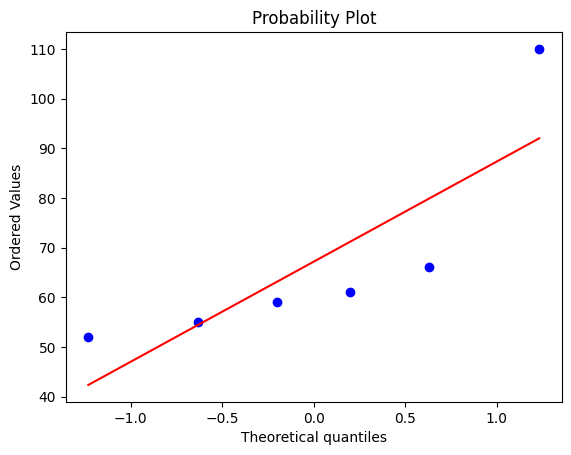

In [239]:
import scipy.stats as stats
#Q-Q Plot 
#빨간선에 가깝게 데이터가 분포 될수록 정규성을 뛴다a
stats.probplot(df["weight"], dist=stats.norm , plot=plt)  #norm -> 정규표차 
plt.show()

In [240]:
#pvalue 가 0.05(5%) 보다 커야 정규성을 뛴다.
shapiro_test =stats.shapiro(df["weight"]) #-> pvalue가 0.002  < 0.05 이므로 정규성 안뜀
shapiro_test

ShapiroResult(statistic=0.7093410491943359, pvalue=0.007742629386484623)

In [241]:
#pvalue 가 0.05(5%) 보다 커야 정규성을 뛴다.
shapiro_test2 =stats.shapiro(df["height"]) #-> pvlaue가 0.24  > 0.05 이므로 정규성 뜀 
shapiro_test2

ShapiroResult(statistic=0.8741567730903625, pvalue=0.2432829588651657)

In [242]:
#UCL, LCL 생성

#M+3시그마 ->UCL , M-3시그마 -> LCL 

df["UCL_W"] = df["weight"].mean() + 2*df["weight"].std()
df["LCL_W"] = df["weight"].mean() - 2*df["weight"].std()

df["UCL_H"] = df["height"].mean() + 2*df["height"].std()
df["LCL_H"] = df["height"].mean() - 2*df["height"].std()

In [243]:
df

,name,weight,height,UCL_W,LCL_W,UCL_H,LCL_H
0,Kate,59,120,110.237152,24.096182,190.986254,4.680412
1,LOUISE,61,123,110.237152,24.096182,190.986254,4.680412
2,JANE,55,115,110.237152,24.096182,190.986254,4.680412
3,JASON,66,145,110.237152,24.096182,190.986254,4.680412
4,TOM,52,64,110.237152,24.096182,190.986254,4.680412
5,JACK,110,20,110.237152,24.096182,190.986254,4.680412


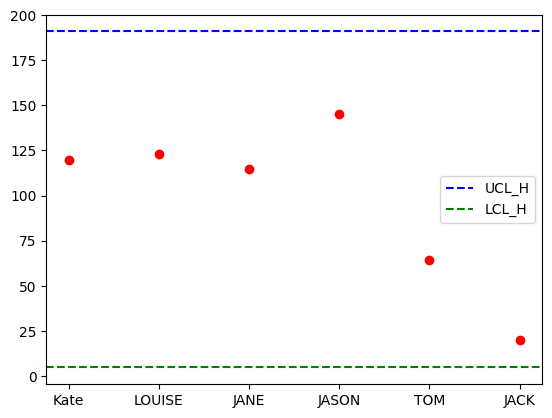

In [244]:
plt.scatter(df["name"] , df["height"], color="red")
plt.axhline(y=df["UCL_H"][0], color='b', linestyle='--', label='UCL_H')
plt.axhline(y=df["LCL_H"][0], color='g', linestyle='--', label='LCL_H')
plt.legend()
plt.show()

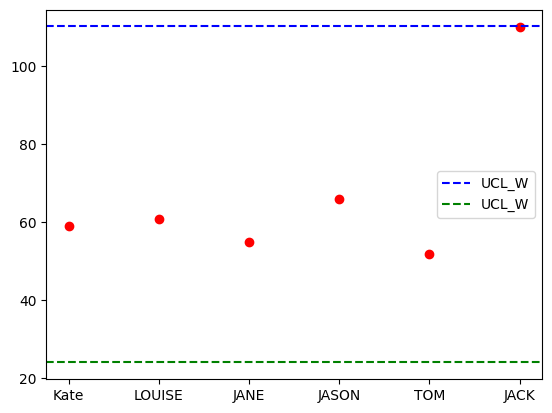

In [245]:
plt.scatter(df["name"] , df["weight"], color="red")
plt.axhline(y=df["UCL_W"][0], color='b', linestyle='--', label='UCL_W')
plt.axhline(y=df["LCL_W"][0], color='g', linestyle='--', label='UCL_W')
plt.legend()
plt.show()

In [246]:
df["weight_alarm"] = ((df["weight"]>df["LCL_W"]) & (df["weight"] < df["UCL_W"]))
df["height_alarm"] = ((df["height"]>df["LCL_W"]) & (df["height"] < df["UCL_W"]))

In [247]:
df

,name,weight,height,UCL_W,LCL_W,UCL_H,LCL_H,weight_alarm,height_alarm
0,Kate,59,120,110.237152,24.096182,190.986254,4.680412,True,False
1,LOUISE,61,123,110.237152,24.096182,190.986254,4.680412,True,False
2,JANE,55,115,110.237152,24.096182,190.986254,4.680412,True,False
3,JASON,66,145,110.237152,24.096182,190.986254,4.680412,True,False
4,TOM,52,64,110.237152,24.096182,190.986254,4.680412,True,True
5,JACK,110,20,110.237152,24.096182,190.986254,4.680412,True,False


In [112]:
import seaborn as sns
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [195]:
dfi = sns.load_dataset("iris")
dfi

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [196]:
#iris 데이터 세트에서 각 컬럼별 3 시그마 룰을 적용해 보세요
#정규성검사 , UCL, LCL 구하기
#시각화 
#종별로 3 sigma role 적용하기
 
shapiro_test1 =stats.shapiro(dfi["sepal_length"] )  
shapiro_test2 =stats.shapiro(dfi["sepal_width"])  
shapiro_test3 =stats.shapiro(dfi["petal_length"])
shapiro_test4 =stats.shapiro(dfi["petal_width"])  

print("sepal_length",shapiro_test1) 
print("sepal_width",shapiro_test2)
print("petal_length",shapiro_test3)
print("petal_length",shapiro_test4) 

sepal_length ShapiroResult(statistic=0.9760899543762207, pvalue=0.01018026564270258)
sepal_width ShapiroResult(statistic=0.9849168062210083, pvalue=0.10112646222114563)
petal_length ShapiroResult(statistic=0.8762685656547546, pvalue=7.412652158755861e-10)
petal_length ShapiroResult(statistic=0.9018340706825256, pvalue=1.680264105630158e-08)


In [205]:
dfi["UCL_W1"] = dfi["sepal_length"].mean() + 2*dfi["sepal_length"] .std()
dfi["LCL_W1"] = dfi["sepal_length"].mean() - 2*dfi["sepal_length"].std()

dfi["UCL_H2"] = dfi["sepal_width"].mean() + 2*dfi["sepal_width"].std()
dfi["LCL_H2"] = dfi["sepal_width"].mean() - 2*dfi["sepal_width"].std()

dfi["UCL_H3"] = dfi["petal_length"].mean() + 2*dfi["petal_length"].std()
dfi["LCL_H3"] = dfi["petal_length"].mean() - 2*dfi["petal_length"].std()

dfi["UCL_H4"] = dfi["petal_width"].mean() + 2*dfi["petal_width"].std()
dfi["LCL_H4"] = dfi["petal_width"].mean() - 2*dfi["petal_width"].std() 

In [206]:
dfi

,sepal_length,sepal_width,petal_length,petal_width,species,UCL_W1,LCL_W1,UCL_H2,LCL_H2,UCL_H3,LCL_H3,UCL_H4,LCL_H4
0,5.1,3.5,1.4,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
1,4.9,3.0,1.4,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
2,4.7,3.2,1.3,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
3,4.6,3.1,1.5,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
4,5.0,3.6,1.4,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
146,6.3,2.5,5.0,1.9,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
147,6.5,3.0,5.2,2.0,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
148,6.2,3.4,5.4,2.3,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142


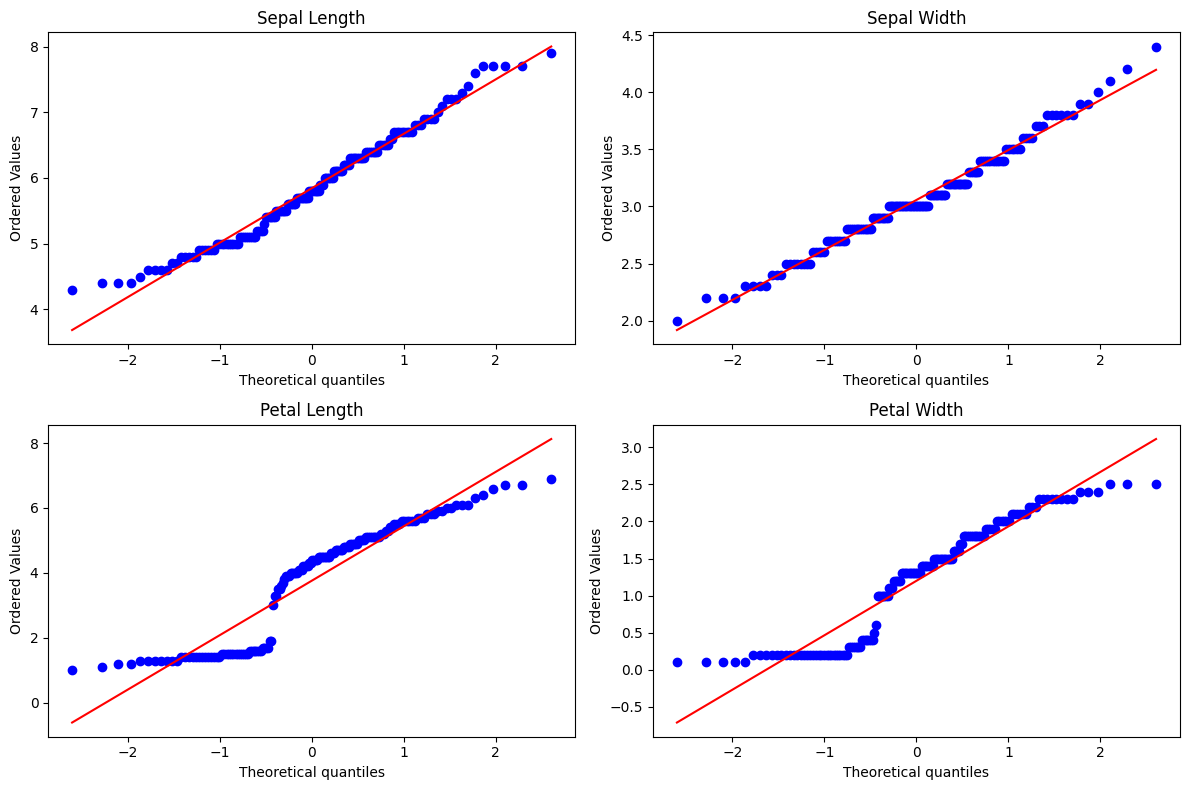

In [207]:
plt.figure(figsize=(12, 8))    
plt.subplot(2, 2, 1)  
stats.probplot(dfi["sepal_length"], dist=stats.norm, plot=plt)
plt.title("Sepal Length")
plt.subplot(2, 2, 2)  
stats.probplot(dfi["sepal_width"], dist=stats.norm, plot=plt)
plt.title("Sepal Width")
plt.subplot(2, 2, 3) 
stats.probplot(dfi["petal_length"], dist=stats.norm, plot=plt)
plt.title("Petal Length")
plt.subplot(2, 2, 4) 
stats.probplot(dfi["petal_width"], dist=stats.norm, plot=plt)
plt.title("Petal Width")
plt.tight_layout()   
plt.show() 

In [208]:
dfi

,sepal_length,sepal_width,petal_length,petal_width,species,UCL_W1,LCL_W1,UCL_H2,LCL_H2,UCL_H3,LCL_H3,UCL_H4,LCL_H4
0,5.1,3.5,1.4,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
1,4.9,3.0,1.4,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
2,4.7,3.2,1.3,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
3,4.6,3.1,1.5,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
4,5.0,3.6,1.4,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
146,6.3,2.5,5.0,1.9,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
147,6.5,3.0,5.2,2.0,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
148,6.2,3.4,5.4,2.3,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142


In [210]:
dfi["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

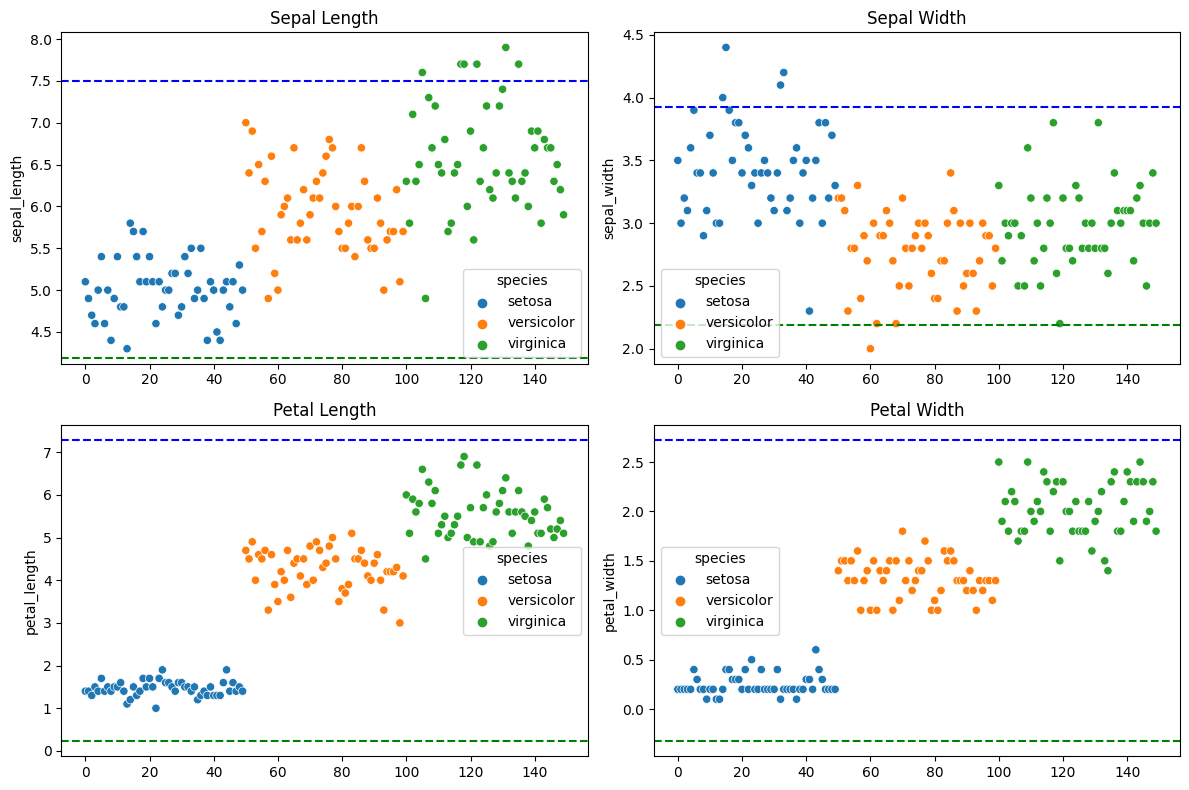

In [209]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(data=dfi, x=dfi.index, y="sepal_length", hue="species")
plt.axhline(y=dfi["UCL_W1"][0], color='b', linestyle='--')
plt.axhline(y=dfi["LCL_W1"][0], color='g', linestyle='--')
plt.title("Sepal Length")

plt.subplot(2, 2, 2)
sns.scatterplot(data=dfi, x=dfi.index, y="sepal_width", hue="species")
plt.axhline(y=dfi["UCL_H2"][0], color='b', linestyle='--')
plt.axhline(y=dfi["LCL_H2"][0], color='g', linestyle='--')
plt.title("Sepal Width")

plt.subplot(2, 2, 3)
sns.scatterplot(data=dfi, x=dfi.index, y="petal_length", hue="species")
plt.axhline(y=dfi["UCL_H3"][0], color='b', linestyle='--')
plt.axhline(y=dfi["LCL_H3"][0], color='g', linestyle='--')
plt.title("Petal Length")

plt.subplot(2, 2, 4)
sns.scatterplot(data=dfi, x=dfi.index, y="petal_width", hue="species")
plt.axhline(y=dfi["UCL_H4"][0], color='b', linestyle='--')
plt.axhline(y=dfi["LCL_H4"][0], color='g', linestyle='--')
plt.title("Petal Width")

plt.tight_layout()
plt.show()